# Lesson 4: Multimodal Retrieval from Vector Stores

<p style="background-color:#fff1d7; padding:15px; "> <b>Note:</b>
We'll use downloaded videos, extracted frames, transcription,
<br>and generated captions from Lesson 3. 
<br>
These data is already included in the symlinked folder `shared_folder`.
<br>
If you haven't already practiced the lesson 3, we pre-populated them.
</p>

### 1. **LanceDB**

**LanceDB** 是一个轻量级的向量数据库，专门为处理大规模向量数据（如从深度学习模型中生成的嵌入向量）而设计。它的核心功能是高效地存储、索引和查询向量数据，主要用于支持高维向量检索任务，如近似最近邻搜索（ANN）、相似度计算等，这在自然语言处理、计算机视觉、推荐系统等领域应用广泛。

#### LanceDB 的特点：
- **高效的向量存储和检索**：LanceDB 针对处理大量高维嵌入向量进行了优化，允许快速检索相似向量。这种能力特别适用于需要快速查找相似内容的应用，如推荐系统和搜索引擎。
- **支持近似最近邻（ANN）搜索**：提供近似最近邻算法来加速高维数据检索任务，使其能处理超大规模的向量数据集。
- **可嵌入的数据库**：LanceDB 轻量且易于嵌入到现有应用程序中，便于与其他应用进行集成。
- **灵活的数据结构支持**：不仅支持嵌入向量，还能存储和查询其他类型的数据。

#### 典型应用场景：
- **自然语言处理（NLP）**：可以用于快速检索相似的文本嵌入，如文本分类、语义搜索等任务。
- **计算机视觉**：用于图像检索，通过图像特征的嵌入来寻找相似的图片。
- **推荐系统**：基于用户行为或产品的嵌入向量，推荐相似的商品或内容。

---

### 2. **LangChain**

**LangChain** 是一个用于构建语言模型应用的框架，它主要帮助开发者将大语言模型（如 GPT、BERT 等）集成到复杂的应用程序中。LangChain 提供了灵活的工具来处理上下文管理、模型的调用和集成、链式推理、多轮对话等任务，让开发者可以更轻松地构建功能强大的 NLP 应用。

#### LangChain 的核心功能：
- **链式调用（Chaining）**：LangChain 的核心是“链式推理”概念，可以将多个步骤的语言模型调用组合在一起，形成一个复杂的逻辑链条。例如，一个应用可以先用模型生成问题，然后再用另一个模型回答问题。
- **集成多种数据源**：LangChain 允许开发者将语言模型与多种数据源（如数据库、API）结合，使模型可以利用动态数据完成任务。
- **工具化的对话管理**：提供对对话管理的支持，能够方便地开发类似于聊天机器人的多轮对话系统。
- **语言模型集成**：LangChain 可以与多个大语言模型服务集成，如 OpenAI 的 GPT 系列模型、Hugging Face 的 Transformers 模型等。

#### 典型应用场景：
- **聊天机器人**：开发支持多轮对话、具有上下文管理的智能聊天机器人。
- **自动化问答系统**：通过链式调用，结合数据库或文件系统中的信息，构建自动化的问答系统。
- **智能工作流**：将多个语言模型的调用组合起来，形成自动化的工作流，完成例如文档生成、信息抽取等复杂任务。

---

### 总结：
- **LanceDB** 适合处理和检索大量高维向量数据，特别是在需要相似度搜索或近似最近邻搜索的任务中使用。
- **LangChain** 则是一个帮助构建复杂语言模型应用的框架，专注于语言模型的集成、上下文管理和链式推理，可以用于构建智能对话系统或自动化问答等应用。

## Setup

是的，Langchain 已经集成了 LanceDB。LanceDB 是一个用于处理稠密和稀疏向量搜索的向量数据库，非常适合用于语义检索等任务。在 Langchain 中，LanceDB 可以作为向量存储库（Vector Store）使用，能够结合其他搜索方法（如 BM25 关键字搜索）进行混合搜索（Hybrid Search）。这种集成可以在搜索系统中结合关键词匹配与语义向量搜索，使检索结果更加准确、符合上下文。

通过 Langchain 的 API，可以轻松将 LanceDB 与大语言模型（如 OpenAI 模型等）集成，用于构建更智能的搜索和问答系统【25†source】。

要将你自己的聊天记录（或其他文本库）投喂给大模型，并让模型能够在特定领域（如聊天对话）生成个性化的响应，你可以使用以下技术和手段，构建一个属于自己的大语言模型或定制模型。这里提供一个路线图和技术堆栈来指导如何进行：

### 1. **数据准备与清洗**
   - **收集聊天记录**：首先，你需要将你的聊天记录或文本库数据收集起来，确保它是结构化或半结构化的数据。例如，文本格式可以是时间戳、对话双方、具体的聊天内容。
   - **数据清洗**：对聊天记录进行预处理，包括去除无关数据（如表情、图片链接）、重复内容、敏感信息（如个人隐私），并确保数据格式一致，以便后续训练模型使用。

### 2. **文本向量化（Embedding）**
   使用向量化技术将文本转换为可以被机器理解的数值表示，常见的工具有：
   - **TF-IDF、Word2Vec、GloVe**：这是早期的文本向量化方法，将单词或句子映射为向量。
   - **BERT、GPT 等预训练模型的嵌入向量**：这些方法可以生成更语义丰富的文本向量，适用于更复杂的对话分析。
   
   你可以通过向量化你的聊天记录，来将对话内容转化为适合模型输入的数值形式。

### 3. **选择预训练模型**
   可以基于预训练模型进行微调（fine-tuning）或增量训练。常用的大模型包括：
   - **GPT 系列**：OpenAI 提供的 GPT 系列模型，如 GPT-3，是当前比较常用的对话模型，可以通过微调适应你的聊天数据。
   - **BERT 系列**：BERT 更适合短文本分类、问答任务，但如果聊天记录中的文本需要理解深层语义，BERT 也可以通过适当的改造来使用。
   - **T5、GPT-Neo、LLaMA** 等开源模型：这些都是可以自定义并用于特定任务的语言模型。

   微调模型的方式有两种：
   1. **全模型微调**：将整个预训练模型用你的数据重新训练，但这种方法需要大量数据和计算资源。
   2. **参数高效微调（如 LoRA、Prefix Tuning 等）**：只针对一部分模型参数进行微调，适合数据量不大但仍希望保持预训练模型性能的情况。

### 4. **微调模型（Fine-tuning）**
   使用微调技术将预训练模型定制为你的个人模型。具体步骤包括：
   - **数据集切分**：将聊天记录切分成训练集、验证集、测试集，按照通常的比例（如 8:1:1）进行划分。
   - **微调训练**：将预训练模型加载进来，通过你的聊天记录对其进行微调，使其学会生成与你聊天数据风格相似的对话内容。可以使用开源工具，如 Hugging Face 的 `transformers` 和 `datasets` 库，或 OpenAI 提供的 API。
   
   例如，在 Hugging Face 中使用 GPT 模型进行微调：
   ```python
   from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments

   # 加载预训练模型和分词器
   model = GPT2LMHeadModel.from_pretrained('gpt2')
   tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

   # 将你的聊天记录转化为模型输入
   train_encodings = tokenizer(chat_logs, truncation=True, padding=True)

   # 定义训练参数
   training_args = TrainingArguments(output_dir='./results', num_train_epochs=3, per_device_train_batch_size=4)

   # 创建 Trainer 对象并进行微调
   trainer = Trainer(model=model, args=training_args, train_dataset=train_encodings)
   trainer.train()
   ```

### 5. **向量数据库与检索增强生成（RAG）**
   如果你有大量的聊天记录或者希望模型具备更好的检索能力，可以结合向量数据库，如 **LanceDB** 或 **FAISS**，存储嵌入向量进行高效的相似度搜索。
   - **RAG (Retrieval-Augmented Generation)**：使用向量数据库进行检索，将聊天记录中的相关信息检索出来，再通过大模型生成回答。这种方法可以提高生成结果的准确性和相关性。

### 6. **部署与API集成**
   微调后的模型可以通过以下方式进行部署：
   - **Hugging Face Hub**：将模型上传到 Hugging Face Hub，方便通过 API 调用和测试。
   - **API 部署**：使用 Flask、FastAPI 等工具将模型部署为 Web 服务，通过 RESTful API 让前端或其他应用调用模型进行对话。
   - **LangChain 集成**：LangChain 提供了工具，用于将你的模型与其他服务集成，比如知识库、数据库、搜索引擎等，帮助模型实现复杂的多轮对话和上下文管理。

### 7. **持续改进与反馈机制**
   模型上线后，你可以根据用户的反馈或新的聊天记录继续进行微调和优化。通过加入反馈机制，不断提高模型的个性化和准确性。

---

### 路线总结：
1. **数据准备与清洗** → 2. **文本向量化** → 3. **选择预训练模型** → 4. **微调模型** → 5. **使用向量数据库（可选）** → 6. **模型部署与集成** → 7. **持续改进**

通过上述技术路线，你可以将自己的聊天记录“投喂”给大模型，定制出专属的智能对话系统。这些工具和方法可以帮助你实现高效的文本处理与生成。

In [2]:
from mm_rag.embeddings.bridgetower_embeddings import (
    BridgeTowerEmbeddings
)
from mm_rag.vectorstores.multimodal_lancedb import MultimodalLanceDB
import lancedb
import json
import os
from PIL import Image
from utils import load_json_file
from utils import display_retrieved_results
#lancedb是什么？


### Setup LanceDB vectorstore

In [3]:
# declare host file
LANCEDB_HOST_FILE = "./shared_data/.lancedb"
# declare table name
TBL_NAME = "test_tbl"
# initialize vectorstore
db = lancedb.connect(LANCEDB_HOST_FILE)

## Ingest Video Corpuses to LanceDB Using Langchain

### Prepare Data

In [4]:
# load metadata files
vid1_metadata_path = './shared_data/videos/video1/metadatas.json'
vid2_metadata_path = './shared_data/videos/video2/metadatas.json'
vid1_metadata = load_json_file(vid1_metadata_path)
vid2_metadata = load_json_file(vid2_metadata_path)

# collect transcripts and image paths
vid1_trans = [vid['transcript'] for vid in vid1_metadata]
vid1_img_path = [vid['extracted_frame_path'] for vid in vid1_metadata]

vid2_trans = [vid['transcript'] for vid in vid2_metadata]
vid2_img_path = [vid['extracted_frame_path'] for vid in vid2_metadata]

<p style="background-color:#fff1d7; padding:15px; "> <b>Notes:</b>
<br>
- We observe that the transcripts of frames extracted from video1 are usually fragmented and even an incomplete sentence. E.g., <i>four more was just icing on the cake for a</i>. Thus, such transcripts are not meaningful and are not helpful for retrieval. In addition, a long transcript that includes many information is also not helpful in retrieval. A naive solution to this issue is to augment such a transcript with the transcripts of n neighboring frames. It is advised that we should pick an individual n for each video such that the updated transcripts say one or two meaningful facts.
<br>
- It is ok to have updated transcripts of neighboring frames overlapped with each other.
<br>
- Changing the transcriptions which will be ingested into vector store along with their corresponding frames will affect directly the performance. It is advised that one needs to do diligent to experiment with one's data to get the best performance.

</p>

In [5]:
# for video1, we pick n = 7
n = 7
updated_vid1_trans = [
 ' '.join(vid1_trans[i-int(n/2) : i+int(n/2)]) if i-int(n/2) >= 0 else
 ' '.join(vid1_trans[0 : i + int(n/2)]) for i in range(len(vid1_trans))
]

# also need to update the updated transcripts in metadata
for i in range(len(updated_vid1_trans)):
    vid1_metadata[i]['transcript'] = updated_vid1_trans[i]

In [6]:
print(f'A transcript example before update:\n"{vid1_trans[6]}"')
print()
print(f'After update:\n"{updated_vid1_trans[6]}"')

A transcript example before update:
"spacewalk and to now have the chance to have done"

After update:
"two months. The view is always amazing I didn't think I would do another spacewalk and to now have the chance to have done four more was just icing on the cake for a a wonderful mission."


### Ingest Data to LanceDB

In [7]:
# initialize an BridgeTower embedder 
embedder = BridgeTowerEmbeddings()


# you can pass in mode="append" 
# to add more entries to the vector store
# in case you want to start with a fresh vector store,
# you can pass in mode="overwrite" instead 

_ = MultimodalLanceDB.from_text_image_pairs(
    texts=updated_vid1_trans+vid2_trans,
    image_paths=vid1_img_path+vid2_img_path,
    embedding=embedder,
    metadatas=vid1_metadata+vid2_metadata,
    connection=db,
    table_name=TBL_NAME,
    mode="overwrite", 
)

100%|██████████| 34/34 [00:17<00:00,  1.97it/s]


## Multimodal Retrieval Using Langchain

### Helper function

A helper function `display_retrieved_results` in `utils.py` to display retrieved results.

### Create Connection to a Table in LanceDB

In [8]:
# open a connection to table TBL_NAME
tbl = db.open_table(TBL_NAME)

print(f"There are {tbl.to_pandas().shape[0]} rows in the table")
# display the first 3 rows of the table
tbl.to_pandas()[['text', 'image_path']].head(3)

There are 34 rows in the table


text  \
0  As I look back on the the mission that we've h...   
1  As I look back on the the mission that we've h...   
2  As I look back on the the mission that we've h...   

                                          image_path  
0  ./shared_data/videos/video1/extracted_frame/fr...  
1  ./shared_data/videos/video1/extracted_frame/fr...  
2  ./shared_data/videos/video1/extracted_frame/fr...

### Retrieval from LanceDB Vector Store using Langchain

In [9]:
# Creating a LanceDB vector store 
vectorstore = MultimodalLanceDB(
    uri=LANCEDB_HOST_FILE, 
    embedding=embedder, 
    table_name=TBL_NAME)

# creating a retriever for the vector store
# search_type="similarity" 
#  declares that the type of search that the Retriever should perform 
#  is similarity search
# search_kwargs={"k": 1} means returning top-1 most similar document
retriever = vectorstore.as_retriever(
    search_type='similarity', 
    search_kwargs={"k": 1}
)

There is/are 1 retrieved result(s)

The caption of the 1-th retrieved result is:
"The image features a young child, possibly a toddler, sitting on a pink playground slide. The child appears to be enjoying their time on the slide. 

In the background, there are two other people, one standing closer to the left side of the image and the other person standing further to the right. The scene seems to be set in a playground or a similar outdoor area."



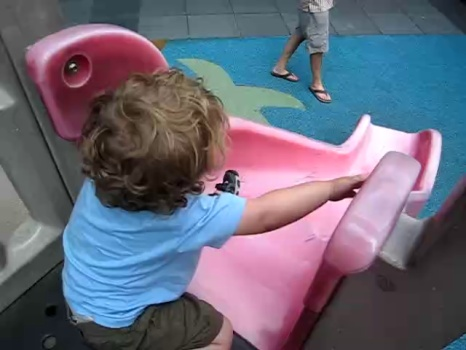

------------------------------------------------------------


In [10]:
query1 = "a toddler and an adult"
results = retriever.invoke(query1)
display_retrieved_results(results)

There is/are 3 retrieved result(s)

The caption of the 1-th retrieved result is:
"The image features a young child, possibly a toddler, sitting on a pink playground slide. The child appears to be enjoying their time on the slide. 

In the background, there are two other people, one standing closer to the left side of the image and the other person standing further to the right. The scene seems to be set in a playground or a similar outdoor area."



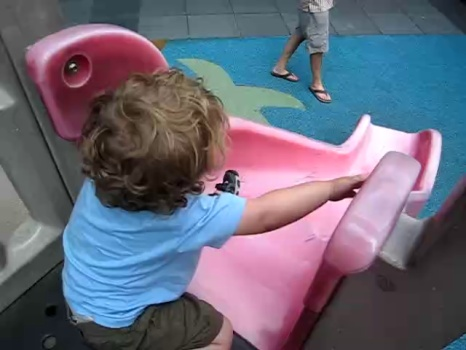

------------------------------------------------------------
The caption of the 2-th retrieved result is:
"The image features a young boy standing on a playground slide, wearing a blue shirt. He appears to be enjoying his time at the playground. 

In the background, there are several other people scattered around the playground, possibly engaging in various activities or watching the boy on the slide. The playground is equipped with a bench, which is located near the left side of the scene."



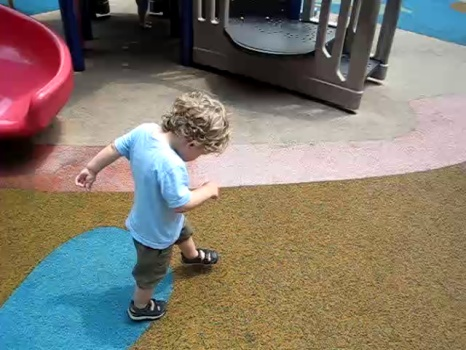

------------------------------------------------------------
The caption of the 3-th retrieved result is:
"The image features two young boys walking together on a playground. They are both wearing blue shirts and are enjoying their time at the park. One of the boys is carrying a bottle, possibly for a drink during their playtime. The playground appears to be a mix of concrete and grass, providing a fun and engaging environment for the children."



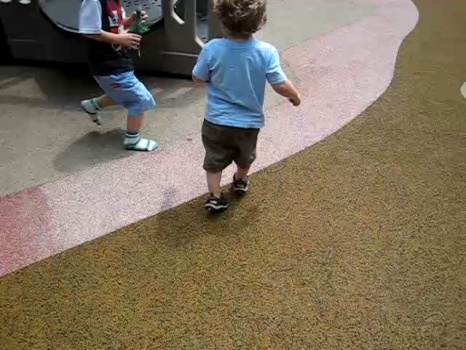

------------------------------------------------------------


In [11]:
# ask to return top 3 most similar documents
retriever = vectorstore.as_retriever(
    search_type='similarity', 
    search_kwargs={"k": 3})
results = retriever.invoke(query1)
display_retrieved_results(results)

### More Examples

There is/are 1 retrieved result(s)

The caption of the 1-th retrieved result is:
"the science activities that happened over the last two months. The view is always amazing I didn't think I would do another spacewalk and to now have the chance to have done four more was just icing on the cake for a"



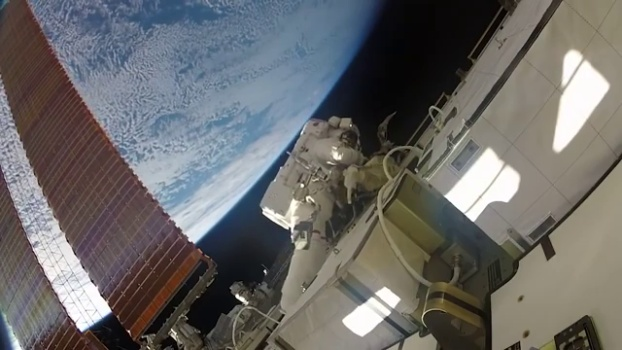

------------------------------------------------------------


In [12]:
retriever = vectorstore.as_retriever(
    search_type='similarity', 
    search_kwargs={"k": 1})
query2 = (
        "an astronaut's spacewalk "
        "with an amazing view of the earth from space behind"
)
results2 = retriever.invoke(query2)
display_retrieved_results(results2)

There is/are 1 retrieved result(s)

The caption of the 1-th retrieved result is:
"As I look back on the the mission that we've had here on the International Space Station, I'm proud to have been a part of much of the science activities that happened over the last two months."



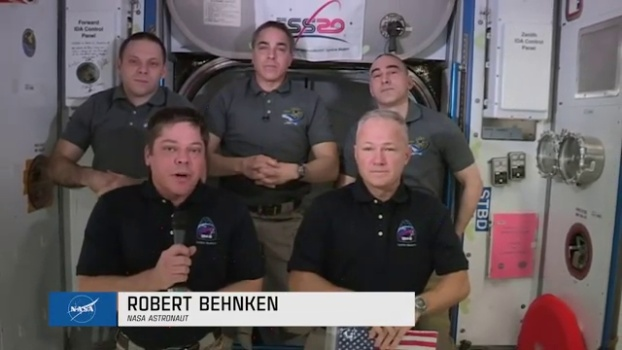

------------------------------------------------------------


In [13]:
query3 = "a group of astronauts"
results3 = retriever.invoke(query3)
display_retrieved_results(results3)